In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_cholesterol = pd.read_csv('./datasets/cholesterol_dataset.csv')

In [23]:
# Check file
df_cholesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   blood_group        996 non-null    object 
 1   smoker             997 non-null    object 
 2   activity_level     996 non-null    object 
 3   age                997 non-null    float64
 4   weight             997 non-null    float64
 5   height             997 non-null    float64
 6   cholesterol_level  1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [7]:
# Remove id column
df_cholesterol.drop(columns=['Id'], axis=1, inplace=True)

In [8]:
# Rename columns
df_cholesterol.columns = [
  'blood_group',
  'smoker',
  'activity_level',
  'age',
  'weight',
  'height',
  'cholesterol_level'
]

In [10]:
# Copy DF to DF EDA
df_cholesterol_eda = df_cholesterol.copy()

In [11]:
# Copy DF to DF Bucketing
df_cholesterol_bucketing = df_cholesterol.copy()

In [31]:
# Visualize the data
df_cholesterol_eda.head(10)

,blood_group,smoker,activity_level,age,weight,height,cholesterol_level
0,B,Yes,Low,33,85.1,186,199.63
1,A,No,Moderate,68,105.0,184,236.98
2,O,No,High,25,64.8,180,161.79
3,A,No,High,43,120.2,167,336.24
4,AB,No,Low,79,88.5,175,226.23
5,B,No,Low,68,66.8,170,185.31
6,A,Yes,Low,60,117.3,181,289.33
7,O,Yes,Moderate,35,86.9,174,216.48
8,O,No,Low,62,81.3,166,235.30
9,B,Yes,High,44,32.7,165,97.79


In [15]:
df_cholesterol_eda.activity_level.unique()

array(['Low', 'Moderate', 'High', nan], dtype=object)

In [27]:
# Detect missing values
df_cholesterol_eda.isna().sum()

blood_group          0
smoker               0
activity_level       0
age                  0
weight               0
height               0
cholesterol_level    0
dtype: int64

In [30]:
# Statistical summary
df_cholesterol_eda.describe()

,age,weight,height,cholesterol_level
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.206000,76.493700,174.890000,199.453260
std,17.450446,21.406986,8.831415,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.775000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,64.250000,89.975000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [19]:
# Distribution of categorical variables
mode_blood_group = df_cholesterol_eda['blood_group'].mode()
mode_smoker = df_cholesterol_eda['smoker'].mode()
mode_activity_level = df_cholesterol_eda['activity_level'].mode()

# Distribution of numerical variables
median_age = df_cholesterol_eda['age'].median()
median_weight = df_cholesterol_eda['weight'].median()
median_height = df_cholesterol_eda['height'].median()

In [26]:
# Replace missing values
df_cholesterol_eda.fillna(value={'blood_group': mode_blood_group[0], 'smoker': mode_smoker[0], 'activity_level': mode_activity_level[0], 'age': median_age, 'weight': median_weight, 'height': median_height}, inplace=True)

In [32]:
# Convert age and height to integer
df_cholesterol_eda.age = df_cholesterol_eda.age.astype(int)
df_cholesterol_eda.height = df_cholesterol_eda.height.astype(int)

# Dataframe Structure
df_cholesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   blood_group        1000 non-null   object 
 1   smoker             1000 non-null   object 
 2   activity_level     1000 non-null   object 
 3   age                1000 non-null   int64  
 4   weight             1000 non-null   float64
 5   height             1000 non-null   int64  
 6   cholesterol_level  1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


<Axes: xlabel='age'>

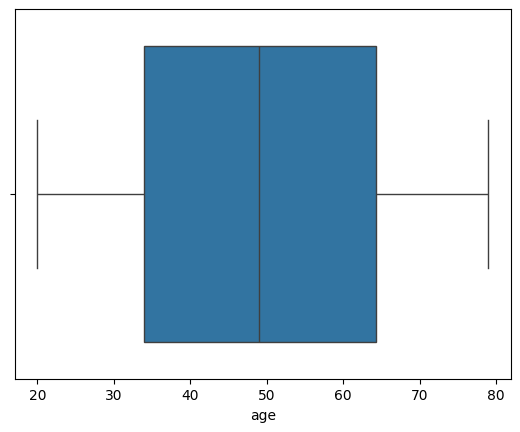

In [34]:
# Detect Outliers
sns.boxplot(data=df_cholesterol_eda, x='age')

<Axes: xlabel='weight'>

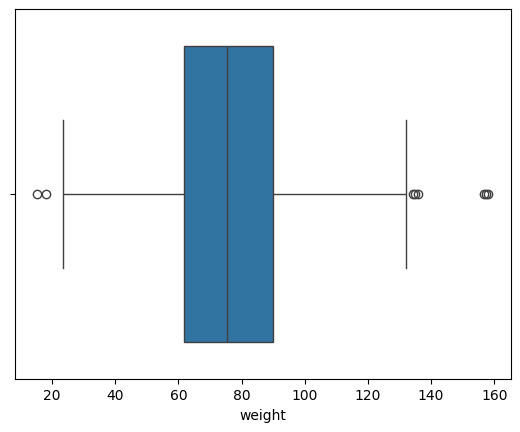

In [38]:
sns.boxplot(data=df_cholesterol_eda, x='weight')

In [41]:
# Filter outliers and remove them
# Filter
df_cholesterol_eda[df_cholesterol_eda['weight'] < 40]
# Remove
df_cholesterol_eda.drop(df_cholesterol_eda[df_cholesterol_eda['weight'] < 40].index, axis=0, inplace=True)